# Decision Trees, Random Forests and Boosting

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import Datasets
import Plotting
import Tools

In [3]:
matplotlib.rcParams['figure.figsize'] = (10, 5)

In [4]:
mu_s = [0.45,0.45]
mu_b = [-0.45,-0.45]
sigma_s = [0.2, 0.3]
sigma_b = [0.2, 0.2]

sig = Datasets.gen_2Dgauss(mu_s,sigma_s,1000)
bkg = Datasets.gen_2Dgauss(mu_b,sigma_b,1000)

# Decision Trees
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier">
SkLearn DecisionTreeClassifier
</a>

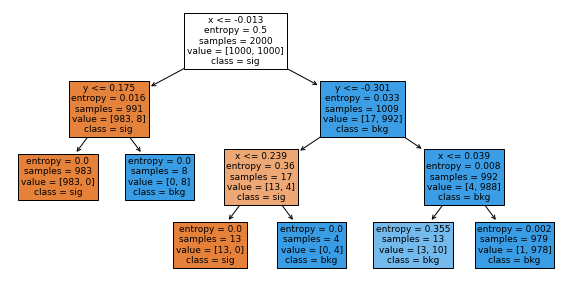

In [5]:
dt = tree.DecisionTreeClassifier(max_depth=3)

Tools.train_mva(dt,sig,bkg)

tree.plot_tree(dt,feature_names=['x','y'],class_names=['sig','bkg'],filled=True)
plt.show()

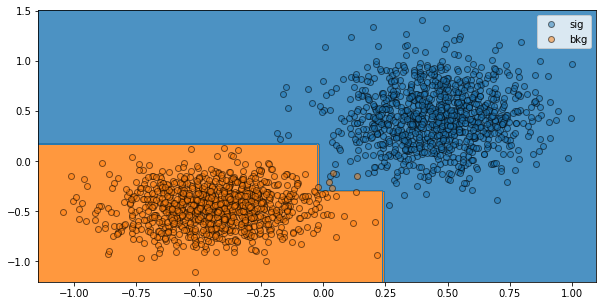

In [6]:
Tools.evaluate_mva(dt,sig,bkg)
plt.show()

# Random Forest Classifier
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">
SkLearn RandomForestClassifier
</a>

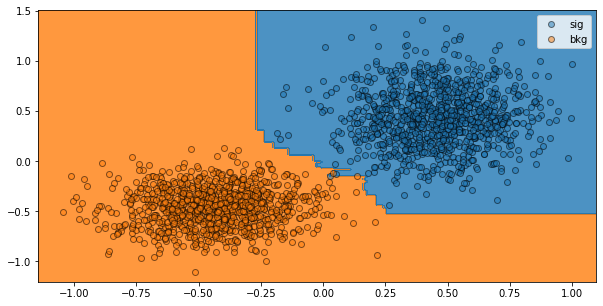

In [7]:
RF = RandomForestClassifier(n_estimators=10, max_depth=None,
                            min_samples_split=2, random_state=0)

Tools.train_mva(RF,sig,bkg)
Tools.evaluate_mva(RF,sig,bkg)
plt.show()

# AdaBoost Decision Tree
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html">
SkLearn AdaBoostClassifier
</a>

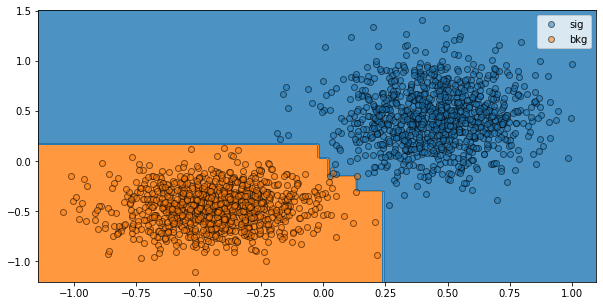

In [8]:
ABDT = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=4),
                         algorithm="SAMME",
                         n_estimators=200)

Tools.train_mva(ABDT,sig,bkg)
Tools.evaluate_mva(ABDT,sig,bkg)
plt.show()

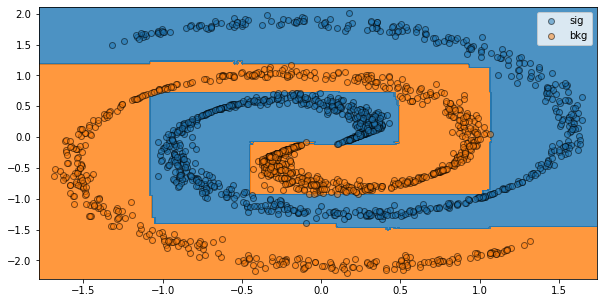

In [9]:
sig_train = Datasets.gen_spiral( a=0.2, s=0, n=1000 )
sig_test  = Datasets.gen_spiral( a=0.2, s=0, n=1000 )

bkg_train = Datasets.gen_spiral( a=-0.2, s=0.2, n=1000 )
bkg_test  = Datasets.gen_spiral( a=-0.2, s=0.2, n=1000 )

ABDT = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=4),
                         algorithm="SAMME",
                         n_estimators=200)

Tools.train_mva(ABDT,sig_train,bkg_train)
Tools.evaluate_mva(ABDT,sig_train,bkg_train)
plt.show()

In [10]:
def errorVsTree(clf,sig_train,bkg_train,sig_test,bkg_test):

    X_train = np.concatenate( [sig_train.values,bkg_train.values] )
    y_train = np.concatenate( [np.ones(len(sig_train.index)),np.zeros(len(bkg_train.index))] )
    X_test = np.concatenate( [sig_test.values,bkg_test.values] )
    y_test = np.concatenate( [np.ones(len(sig_test.index)),np.zeros(len(bkg_test.index))] )

    train_errors = []
    test_errors  = []
    
    for train_predict,test_predict in zip(clf.staged_predict(X_train),clf.staged_predict(X_test)):
        train_errors.append(1. - accuracy_score(train_predict, y_train))
        test_errors.append(1. - accuracy_score(test_predict, y_test))

    n_trees = len(clf)

    plt.plot(range(1, n_trees + 1), train_errors, c='red', label='Train')
    plt.plot(range(1, n_trees + 1), test_errors, c='black', label='Test')
    plt.legend()
    plt.ylim(0.9*min(min(train_errors),min(test_errors)),1.1*max(max(train_errors),max(test_errors)))
    plt.ylabel('Test Error')
    plt.xlabel('Number of Trees')
    plt.show()

    return

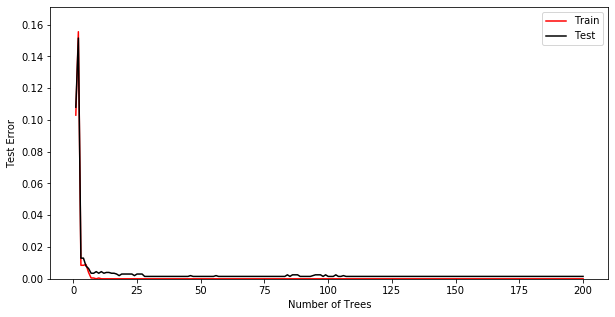

In [11]:
errorVsTree(ABDT,sig_train,bkg_train,sig_test,bkg_test)

# Gradient Boost Decision Tree
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html">
SkLearn GradientBoodtingClassifier
</a>

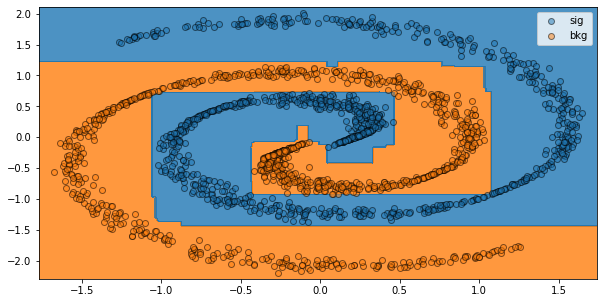

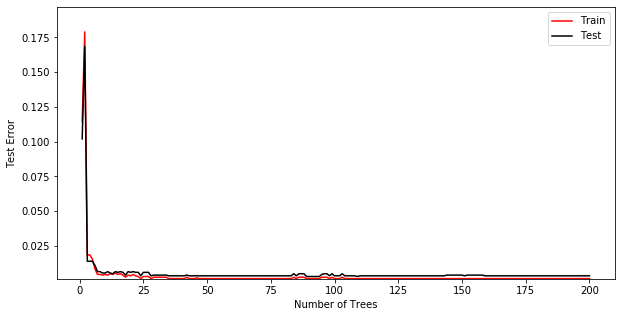

In [12]:
sig_train = Datasets.gen_spiral( a=0.2, s=0, n=1000 )
sig_test  = Datasets.gen_spiral( a=0.2, s=0, n=1000 )

bkg_train = Datasets.gen_spiral( a=-0.2, s=0.2, n=1000 )
bkg_test  = Datasets.gen_spiral( a=-0.2, s=0.2, n=1000 )

GBDT = GradientBoostingClassifier(max_depth=4,learning_rate=0.1,
                               n_estimators=200,random_state=0)

Tools.train_mva(GBDT,sig_train,bkg_train)
Tools.evaluate_mva(GBDT,sig_train,bkg_train)
plt.show()
errorVsTree(ABDT,sig_train,bkg_train,sig_test,bkg_test)

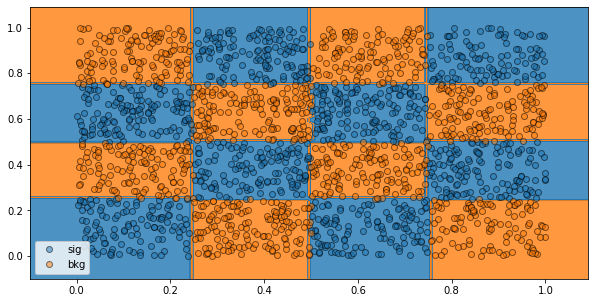

In [13]:
sig = Datasets.gen_chess('s',1000)
bkg = Datasets.gen_chess('b',1000)

GBDT = GradientBoostingClassifier(max_depth=4,learning_rate=0.1,
                               n_estimators=200,random_state=0)

Tools.train_mva(GBDT,sig,bkg)
Tools.evaluate_mva(GBDT,sig,bkg)
plt.show()